In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

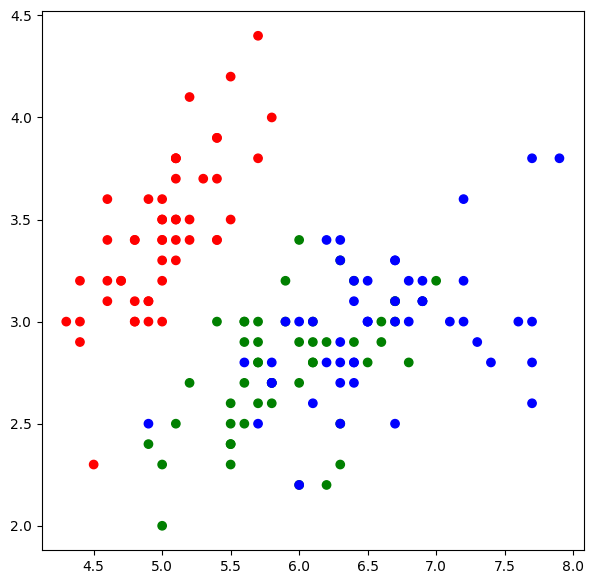

In [14]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Евклидова метрика

In [4]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Вычисление весов

In [5]:
def get_weight1(distance, weight_type='', q=0.5, a=1):
    return 1 / distance if distance != 0 else 0

In [6]:
def get_weight2(distance, weight_type='', q=0.5, a=1):
    return q ** distance

In [7]:
def get_weight3(distance,q=0.5, a=1):
    return 1 / (distance + a)

Алгоритм поиска k ближайших соседей

In [11]:
def knn(x_train, y_train, x_test, k):

    answers = []
    for x in x_test:
        test_distances = []

        for i in range(len(x_train)):

            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))

        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d, label in sorted(test_distances)[0:k]:
            weight = get_weight3(d)
            classes[label] += weight

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])

    return answers

Функция вычисления точности

In [9]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [20]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    y_pred = knn(X_train, y_train, X_test, k)
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(6,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}, Точность = {accuracy(y_pred, y_test):.3f}")
    plt.show()

(2352, 2)


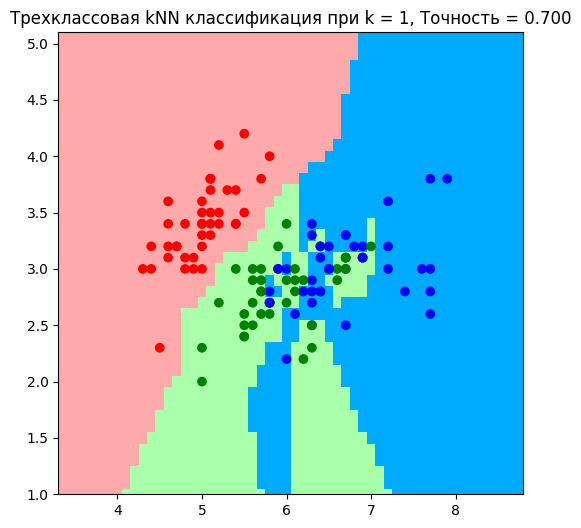

(2352, 2)


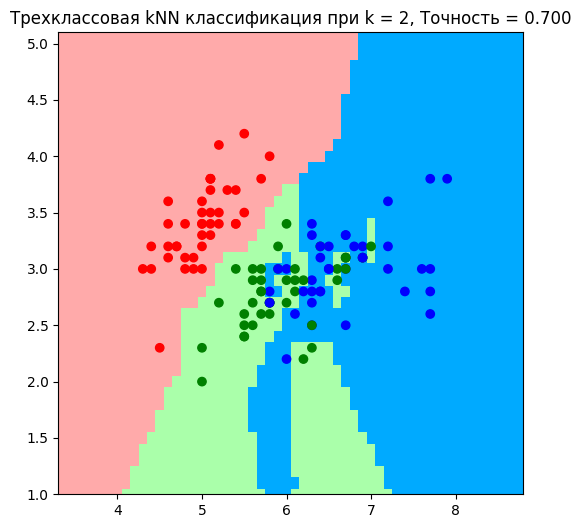

(2352, 2)


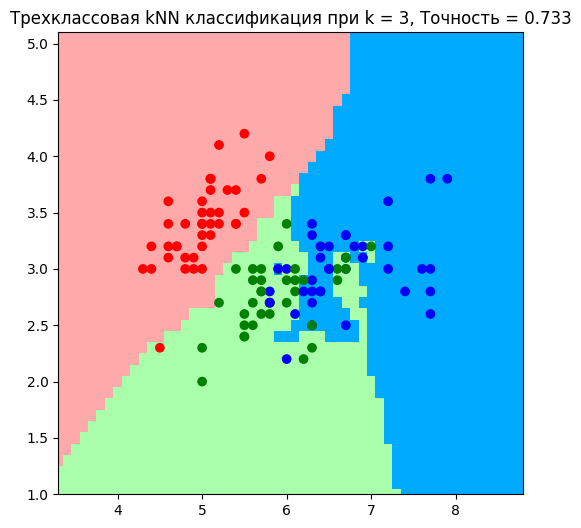

(2352, 2)


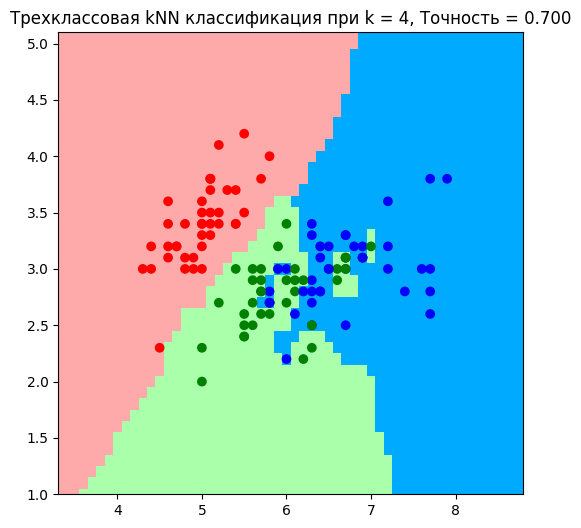

(2352, 2)


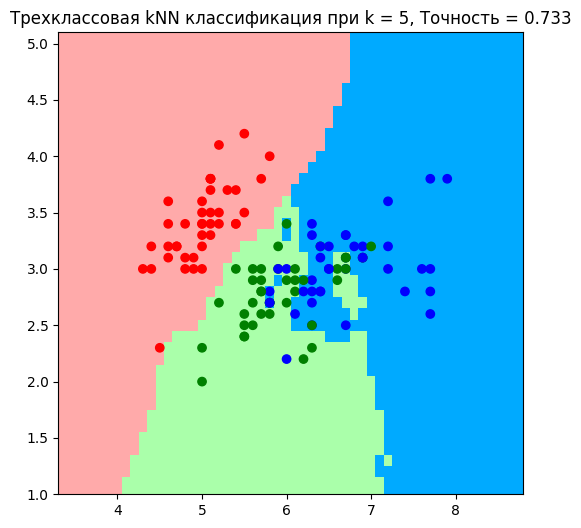

In [21]:
k_values = range(1, 6)
for j, k in enumerate(k_values):
  get_graph(X_train, y_train, k)
